In [58]:
import numpy as np
import os
import pandas as pd

In [59]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoded)
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss #+ 0.09*constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [60]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=150,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/150
15000/15000 [==============================] - 0s - loss: 126.4514 - val_loss: 101.8769
Epoch 2/150
15000/15000 [==============================] - 0s - loss: 101.9043 - val_loss: 99.5528
Epoch 3/150
15000/15000 [==============================] - 0s - loss: 100.8493 - val_loss: 99.1843
Epoch 4/150
15000/15000 [==============================] - 0s - loss: 100.5749 - val_loss: 98.8922
Epoch 5/150
15000/15000 [==============================] - 0s - loss: 100.3669 - val_loss: 100.9216
Epoch 6/150
15000/15000 [==============================] - 0s - loss: 100.3026 - val_loss: 98.6808
Epoch 7/150
15000/15000 [==============================] - 0s - loss: 100.2137 - val_loss: 99.3030
Epoch 8/150
15000/15000 [==============================] - 0s - loss: 100.1350 - val_loss: 99.4944
Epoch 9/150
15000/15000 [==============================] - 0s - loss: 100.0817 - val_loss: 98.6189
Epoch 10/150
15000/15000 [==============================] 

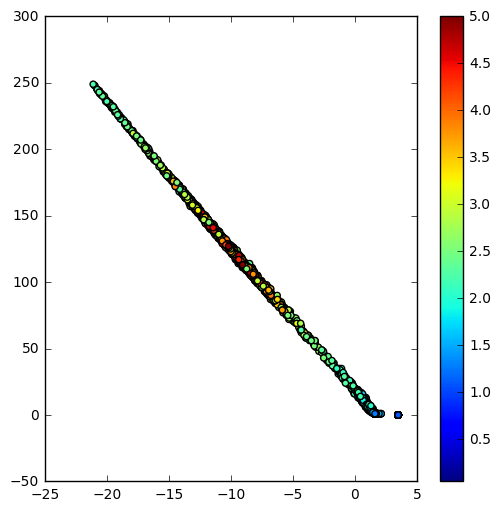

In [64]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, encoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( x_test_encoded[:, 0] ,y_test, c=T_test)
plt.colorbar()  
plt.show()  



In [65]:
Magnet_trained = Model(x, encoded)

In [66]:
Magnet_trained

In [67]:
Magnet_trained.layers[2].get_weights()[0].shape

(128, 1)

In [68]:
Magnet_trained.layers[2].get_weights()[1].shape

(1,)

In [69]:
Magnet_trained.layers[1].get_weights()[0].shape

(256, 128)

In [70]:
Magnet_trained.layers[1].get_weights()[1].shape

(128,)

In [73]:
import tensorflow as tf
W_0 = tf.convert_to_tensor(Magnet_trained.layers[1].get_weights()[0])
b_0 = tf.convert_to_tensor(Magnet_trained.layers[1].get_weights()[1])
W_1 = tf.convert_to_tensor(Magnet_trained.layers[2].get_weights()[0])
b_1 = tf.convert_to_tensor(Magnet_trained.layers[2].get_weights()[1])

In [72]:
K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

<tf.Tensor 'BiasAdd_11:0' shape=(?, 1) dtype=float32>

In [93]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)

def calc_mm(x):
    return K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(calc_mm(x)-calc_mm(decoded)))
    #xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [88]:
K.sum(calc_mm(x))

<tf.Tensor 'Sum_15:0' shape=() dtype=float32>

In [89]:
K.sum(K.sum(x,axis=-1))

<tf.Tensor 'Sum_17:0' shape=() dtype=float32>

In [94]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 0s - loss: 1640079.4779 - val_loss: 131489.9241
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 108300.1567 - val_loss: 43371.4967
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 74073.5905 - val_loss: 255281.6534
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 63109.5295 - val_loss: 23632.5974
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 53957.2071 - val_loss: 68910.6539
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 47212.7569 - val_loss: 24395.2045
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 41921.2622 - val_loss: 65552.3454
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 38004.3766 - val_loss: 49218.5520
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 36634.3813 - val_loss: 39997.1772
Epoch 10/50
15000/1

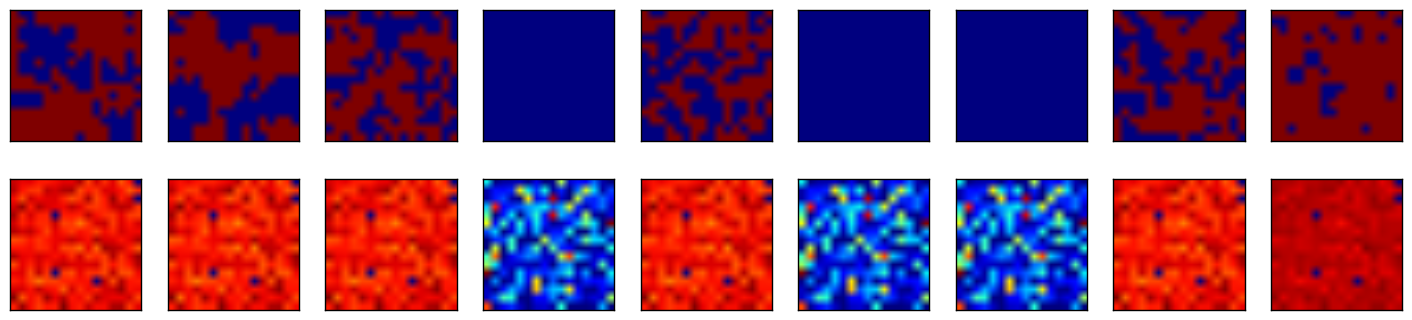

In [95]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [97]:
#failed, because the value of encoded layers might be very strange.
#Will VAE work?

In [98]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128  #AE is 128
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
z_mean = Dense(latent_dim)(h)  
z_log_var = Dense(latent_dim)(h)  



#Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon



z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

 
decoder_h = Dense(intermediate_dim, activation='relu')(z) 
decoder_mean = Dense(original_dim, activation='sigmoid')(decoder_h)




def vae_loss(x, decoder_mean):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    constrain_loss = -K.sum(K.square(decoder_mean-0.5))
    return xent_loss + 1*kl_loss  + 0*constrain_loss

vae = Model(x, decoder_mean) 
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values
for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]


In [99]:
vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test))  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 1s - loss: 142.9932 - val_loss: 126.5607
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 120.5911 - val_loss: 119.6625
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 116.4450 - val_loss: 118.1828
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 115.6267 - val_loss: 118.2819
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 114.9063 - val_loss: 115.5937
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 113.1628 - val_loss: 114.4536
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 109.9472 - val_loss: 110.3045
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 106.4071 - val_loss: 109.1614
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 105.1123 - val_loss: 107.4670
Epoch 10/50
15000/15000 [==============================] - 0

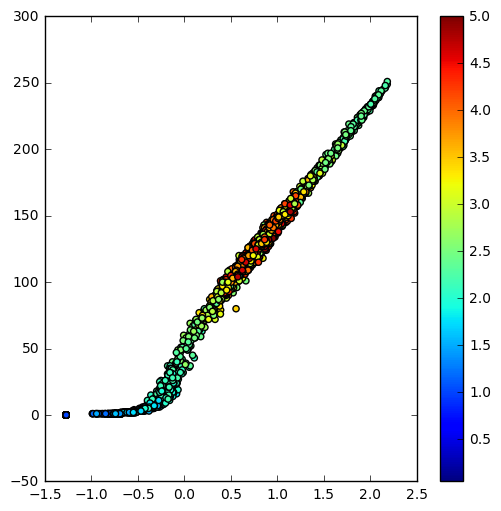

In [102]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, z_mean)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded_1 = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( (x_test_encoded_1[:, 0]) ,y_test , c=T_test)  
plt.colorbar()  
plt.show()  
  


In [104]:
Magnet_trained= Model(x, z_mean)

In [105]:
import tensorflow as tf
W_0 = tf.convert_to_tensor(Magnet_trained.layers[1].get_weights()[0])
b_0 = tf.convert_to_tensor(Magnet_trained.layers[1].get_weights()[1])
W_1 = tf.convert_to_tensor(Magnet_trained.layers[2].get_weights()[0])
b_1 = tf.convert_to_tensor(Magnet_trained.layers[2].get_weights()[1])

In [106]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)

def calc_mm(x):
    return K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(calc_mm(x)-calc_mm(decoded)))
    #xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [107]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 1s - loss: 61588.2372 - val_loss: 7167.2123
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 2055.2304 - val_loss: 1678.4764
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 241.3253 - val_loss: -1407.3448
Epoch 4/50
15000/15000 [==============================] - 0s - loss: -284.1565 - val_loss: 7681.8735
Epoch 5/50
15000/15000 [==============================] - 0s - loss: -662.2535 - val_loss: 1289.0725
Epoch 6/50
15000/15000 [==============================] - 0s - loss: -932.7809 - val_loss: -2026.8010
Epoch 7/50
15000/15000 [==============================] - 0s - loss: -1193.2790 - val_loss: -2363.8284
Epoch 8/50
15000/15000 [==============================] - 0s - loss: -1328.0446 - val_loss: -2182.5774
Epoch 9/50
15000/15000 [==============================] - 0s - loss: -1529.6863 - val_loss: 231.0303
Epoch 10/50
15000/15000 [===========

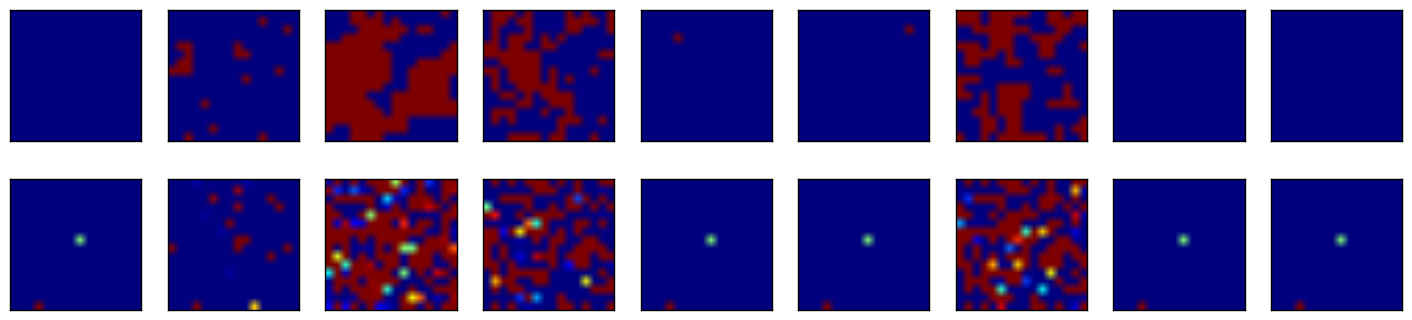

In [108]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

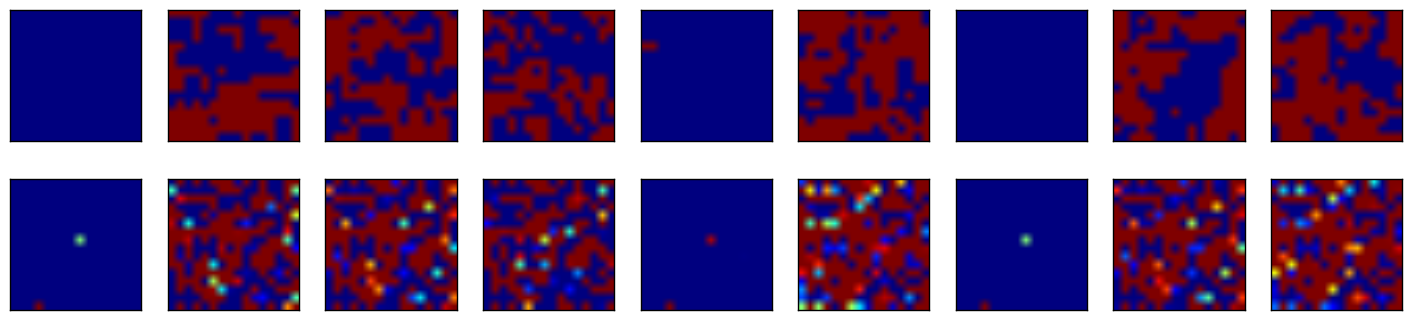

In [115]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
N = 30
plt.figure(figsize=(20, 4))
for i in range(N-n+1,N):
    # display original
    ax = plt.subplot(2,n,i-N+n)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+n-N+n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

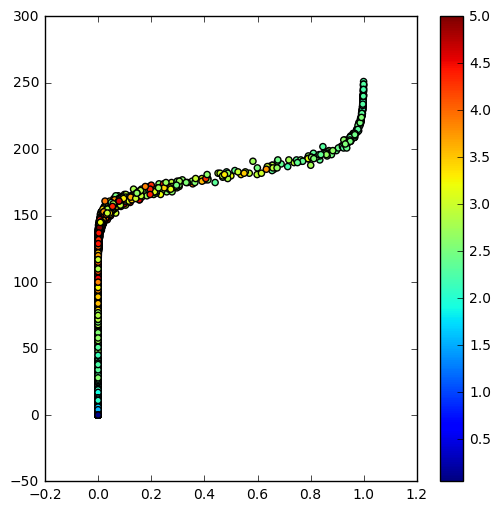

In [117]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, decoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded_1 = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( (x_test_encoded_1[:, 0]) ,y_test , c=T_test)  
plt.colorbar()  
plt.show()  
  


In [135]:
'''''Then try VAE instead of AE'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128  #AE is 128
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
z_mean = Dense(latent_dim)(h)  
z_log_var = Dense(latent_dim)(h)  



#Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon



z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

 
decoder_h = Dense(intermediate_dim, activation='relu')(z) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)

def calc_mm(x):
    return K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

def vae_loss(x, decoded):  
    xent_loss =K.sum(K.square(calc_mm(x)-calc_mm(decoded)))
    #xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss + kl_loss



#def vae_loss(x, decoder_mean):  
#    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
#    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
#    constrain_loss = -K.sum(K.square(decoder_mean-0.5))
#    return xent_loss + 1*kl_loss  + 0*constrain_loss

vae = Model(x, decoded) 
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values
for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [136]:
vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=30,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 1s - loss: 118319.5213 - val_loss: 51114.2703
Epoch 2/30
15000/15000 [==============================] - 0s - loss: 30274.3977 - val_loss: 23672.0116
Epoch 3/30
15000/15000 [==============================] - 0s - loss: 19250.1588 - val_loss: 17087.1578
Epoch 4/30
15000/15000 [==============================] - 0s - loss: 15672.3068 - val_loss: 14130.6897
Epoch 5/30
15000/15000 [==============================] - 0s - loss: 13955.5352 - val_loss: 16598.7097
Epoch 6/30
15000/15000 [==============================] - 0s - loss: 13688.5278 - val_loss: 12427.6679
Epoch 7/30
15000/15000 [==============================] - 0s - loss: 14135.2056 - val_loss: 35032.4440
Epoch 8/30
15000/15000 [==============================] - 0s - loss: 12467.6110 - val_loss: 12661.6000
Epoch 9/30
15000/15000 [==============================] - 0s - loss: 12198.0195 - val_loss: 12603.4472
Epoch 10/30
15000/15000

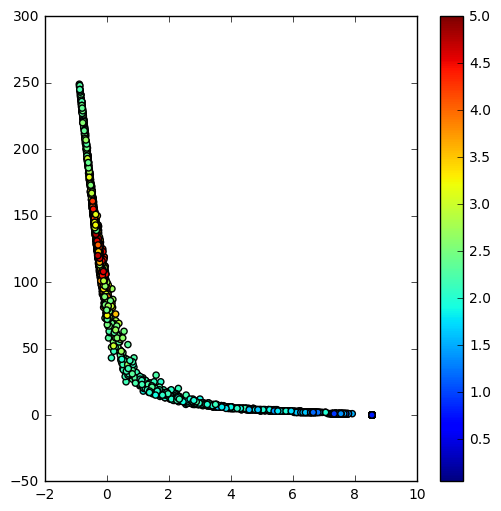

In [137]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, z_mean)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded_1 = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( (x_test_encoded_1[:, 0]) ,y_test , c=T_test)  
plt.colorbar()  
plt.show()  
  


/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


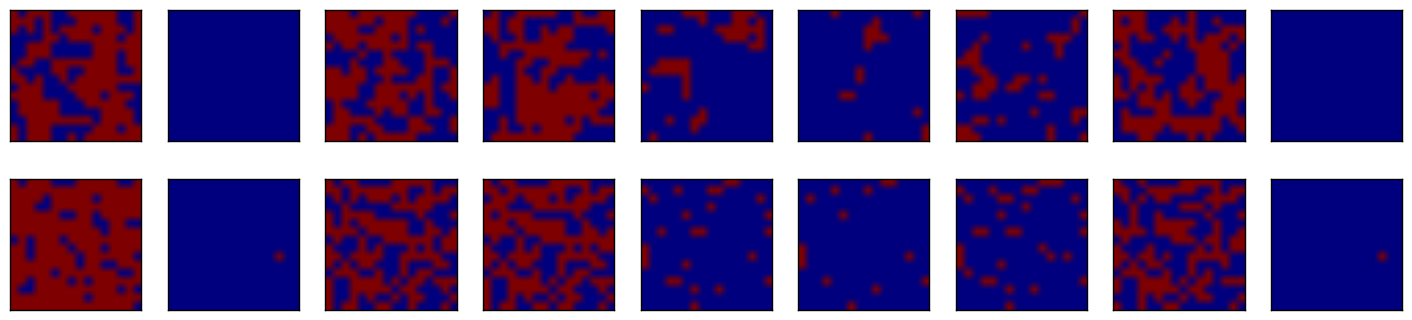

In [138]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
augment_scale = 1
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = vae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16*np.sqrt(augment_scale),16*np.sqrt(augment_scale))))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [174]:
'''''Then try VAE instead of AE + use concatenate'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda,concatenate
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128  #AE is 128
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
z_mean = Dense(latent_dim)(h)  
z_log_var = Dense(latent_dim)(h)  



#Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon



z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

Merged_1 = concatenate([z,x])
#decoder_h = Dense(intermediate_dim, activation='relu')(Merged_1) 
decoded = Dense(original_dim, activation='sigmoid')(Merged_1)

def calc_mm(x):
    return K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

def vae_loss(x, decoded):  
    xent_loss =K.sum(K.square(calc_mm(x)-calc_mm(decoded)))
    #xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss + kl_loss



#def vae_loss(x, decoder_mean):  
#    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
#    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
#    constrain_loss = -K.sum(K.square(decoder_mean-0.5))
#    return xent_loss + 1*kl_loss  + 0*constrain_loss

vae = Model(x, decoded) 
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values
for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [175]:
vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=30,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 2s - loss: 185566.9497 - val_loss: 85595.5886
Epoch 2/30
15000/15000 [==============================] - 0s - loss: 27615.8031 - val_loss: 962.3731
Epoch 3/30
15000/15000 [==============================] - 0s - loss: -447.3712 - val_loss: -2215.3386
Epoch 4/30
15000/15000 [==============================] - 0s - loss: -2526.6986 - val_loss: -3542.3372
Epoch 5/30
15000/15000 [==============================] - 0s - loss: -3235.7151 - val_loss: -2276.8187
Epoch 6/30
15000/15000 [==============================] - 0s - loss: -3552.1128 - val_loss: -4559.0163
Epoch 7/30
15000/15000 [==============================] - 0s - loss: -3799.9635 - val_loss: -4364.5248
Epoch 8/30
15000/15000 [==============================] - 0s - loss: -3982.2392 - val_loss: -1387.4412
Epoch 9/30
15000/15000 [==============================] - 0s - loss: -4031.6858 - val_loss: -4893.0802
Epoch 10/30
15000/15000 [=

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


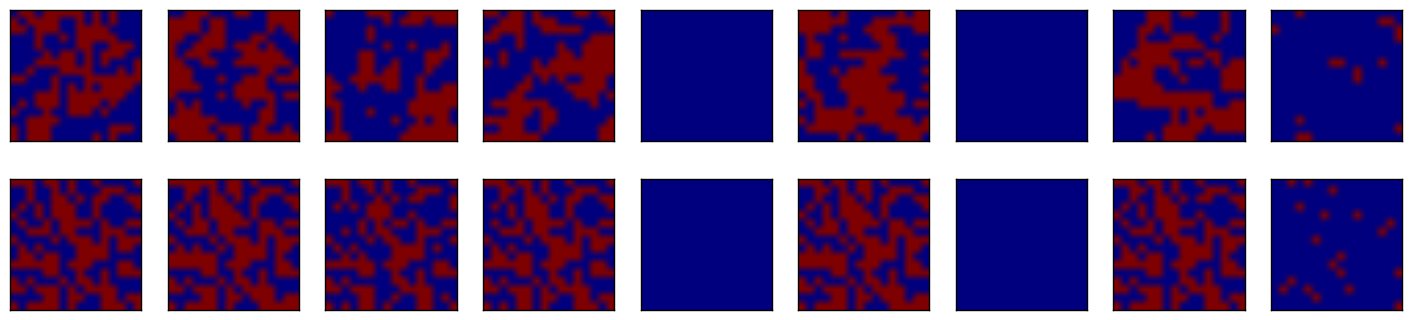

In [176]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
augment_scale = 1
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = vae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16*np.sqrt(augment_scale),16*np.sqrt(augment_scale))))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

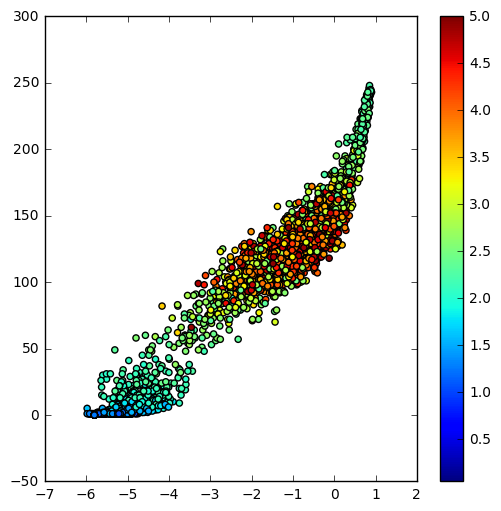

In [149]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, z_mean)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded_1 = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( (x_test_encoded_1[:, 0]) ,y_test , c=T_test)  
plt.colorbar()  
plt.show()  
  


In [150]:
'''why not use the decoder itself? or a MLP/CNN'''

'why not use the decoder itself? or a MLP/CNN'

In [180]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda,concatenate
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128  #AE is 128
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
x = Input(shape=(original_dim,))  

#Merged_1 = concatenate([x,x,x,x])
#decoder_h = Dense(intermediate_dim, activation='relu')(x) 
decoded = Dense(original_dim, activation='sigmoid')(x)

def calc_mm(x):
    return K.bias_add(K.dot(K.bias_add(K.dot(x,W_0),b_0),W_1),b_1)

def vae_loss(x, decoded):  
    xent_loss =K.sum(K.square(calc_mm(x)-calc_mm(decoded)))
    #xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    #kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + 2*constrain_loss 



#def vae_loss(x, decoder_mean):  
#    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)
#    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
#    constrain_loss = -K.sum(K.square(decoder_mean-0.5))
#    return xent_loss + 1*kl_loss  + 0*constrain_loss

gene= Model(x, decoded) 
gene.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values
for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [181]:
gene.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=30,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 1s - loss: 236904.4173 - val_loss: 212071.9581
Epoch 2/30
15000/15000 [==============================] - 0s - loss: 195433.6149 - val_loss: 176636.7178
Epoch 3/30
15000/15000 [==============================] - 0s - loss: 162088.0486 - val_loss: 147836.7580
Epoch 4/30
15000/15000 [==============================] - 0s - loss: 133714.0806 - val_loss: 120181.4637
Epoch 5/30
15000/15000 [==============================] - 0s - loss: 109366.8765 - val_loss: 97746.4792
Epoch 6/30
15000/15000 [==============================] - 0s - loss: 88471.9407 - val_loss: 79018.4384
Epoch 7/30
15000/15000 [==============================] - 0s - loss: 70696.6655 - val_loss: 62442.1364
Epoch 8/30
15000/15000 [==============================] - 0s - loss: 55798.4736 - val_loss: 48896.4621
Epoch 9/30
15000/15000 [==============================] - 0s - loss: 43334.9211 - val_loss: 37928.3666
Epoch 10/30
150

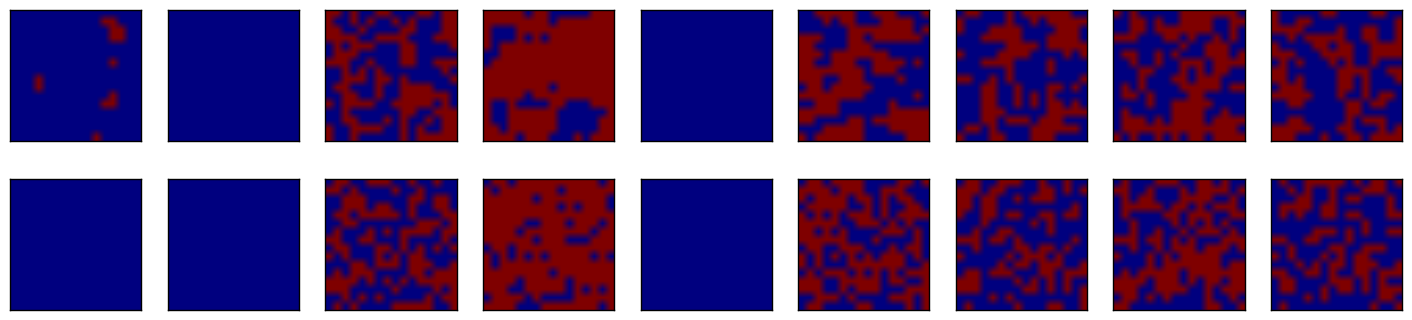

In [182]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = gene.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
N = 50
plt.figure(figsize=(20, 4))
for i in range(N-n+1,N):
    # display original
    ax = plt.subplot(2,n,i-N+n)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+n-N+n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

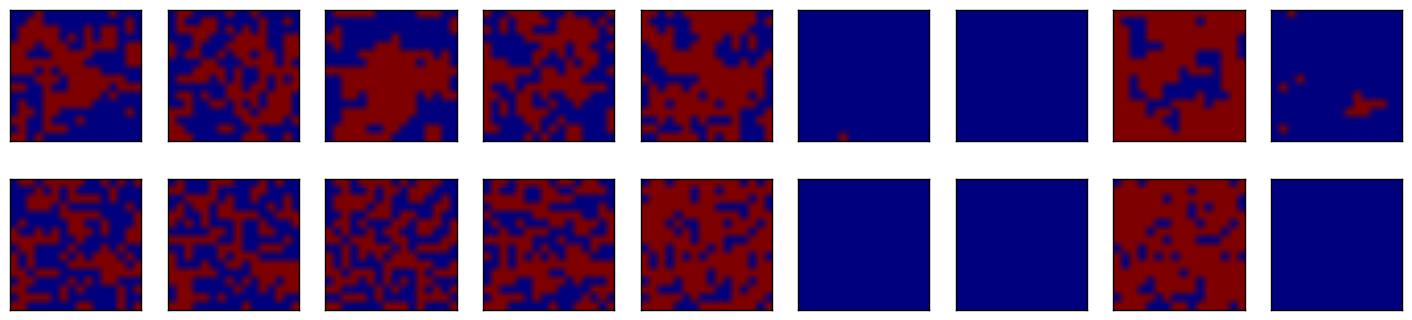

In [186]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = gene.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
N = 20
plt.figure(figsize=(20, 4))
for i in range(N-n+1,N):
    # display original
    ax = plt.subplot(2,n,i-N+n)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+n-N+n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [184]:
decoded_imgs[1]

array([ 0.00061945,  0.02061238,  0.0367079 ,  0.00079188,  0.02792407,
        0.02221818,  0.02530043,  0.01667623,  0.02313834,  0.02709064,
        0.03002185,  0.02471794,  0.02358152,  0.01693113,  0.0006553 ,
        0.02795994,  0.02295958,  0.02493002,  0.01876999,  0.02168597,
        0.01728577,  0.01906634,  0.02493519,  0.02389661,  0.02657832,
        0.0006025 ,  0.01882076,  0.01507138,  0.02514009,  0.02317465,
        0.02821649,  0.02823357,  0.01878067,  0.02703762,  0.03428101,
        0.01426289,  0.02441044,  0.03281526,  0.00078005,  0.03238196,
        0.02740498,  0.02190391,  0.03086624,  0.03214361,  0.02470005,
        0.02791035,  0.02891793,  0.00059088,  0.02951032,  0.01742391,
        0.0287357 ,  0.01957078,  0.02620379,  0.03208297,  0.03118599,
        0.02391025,  0.02550155,  0.00057064,  0.02280018,  0.00071059,
        0.02824518,  0.02586313,  0.02728873,  0.00056733,  0.02782173,
        0.01538995,  0.0271746 ,  0.02401192,  0.02698899,  0.02